## Overview
In this notebook, we will implement a simple perceptron with 2 inputs and train it on an 8x8 card. 
*  The perceptron will try and predict a horizontal boundary for a single card. 
*  We will then train the perceptron on a deck of cards. We will re-use the trained weights from the previous trainings.
    * This should test how the perceptron behaves when it sees completely new cards.
    * The errors *should* reduce as the percerptron sees more cards and the weights get better over time. 

## The Data
* Each card is generated as a 8x8 matrix. 
* At some random horizontal offset (in the card above its 'y>5'), the card will only output positive values.
* Green corresponds to inputs that must produce a positive output, red to negative. 
* The card, in essence, is horizontally partitioned between positive and negative regions.
* The perceptron should be able to learn this boundary.

<img src="../static/h1.png" alt="Card" style="width: 200px;">

### Input Vector
For training purposes, the inputs are stored as a one dimensional array X, of 64 elements. 
* Inputs are the `(x,y)` co-ordinates of the card. Hence, in a range of `(0,0)` to `(7,7)`.
* Green corresponds to inputs that must produce a positive output, red to negative. 

E.g. here the inputs will be represented as

``` python
X =  [ 
        [0,0],
        [0. 1.]
        [0. 2.]
        ..
        [0. 7.]
        [1. 0.]
        [1. 1.]
        ..
        [7. 7.]
    ]
```

### Output Vector
The outputs are correspondingly stored in a one dimensional array Y, of 64 elements.
* Every value is `1` or `-1`
* Every 8 elements represent a vertical column in the card,

![Serialized Output](../static/serialized-y.png)

``` python
   

#(x,y): (0,0)   (0,1)   (0,2)   (0,3)   (0,4)   (0,5)   (0,6)   (0,7)        
    Y = [
        -1,     -1,     -1,     -1,     -1,     -1,     1,      1, 
        
       ...
       
        -1,     -1,     -1,     -1,     -1,     -1,     1,      1,         
    ]
#(x,y): (7,0)   (7,1)   (7,2)   (7,3)   (7,4)   (7,5)   (7,6)   (7,7)    
```


In [144]:
import numpy as np
import copy
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [146]:

#generate a training card with a rectangular section marked positive 
def training_card(size=8, horizontal_partition = True, vertical_partition = True):
    X = np.zeros((size*size,2))
    Y = np.zeros([X.shape[0]])
    
    s = 0
    t_y = random.uniform(size/4,3*size/4) if horizontal_partition else -1
    t_x = random.uniform(0,size) if vertical_partition else -1  
    print("card_t:",t_x,t_y)
    for i in range (0,size):    
        for j in range (0,size):
            X[s]=[i,j] 
            Y[s]= 1 if (j> t_y and i>t_x) else -1
            s+=1
    return (X,Y)            

def draw_card(X,Y):
    plt.figure(figsize=(2,2))
    for i, x in enumerate(X):
        if Y[i] > 0:
            plt.scatter(x[0], x[1], s=100, marker='s', color='green',linewidths=2)
        # Plot the positive samples
        else:
            plt.scatter(x[0], x[1], s=100, marker='s', color='red', linewidths=2)
        

#### Perceptron Algorithm

$$ 
    z = \sum_{i=1}^n x_i w_i + b 
$$

$$ 
    output = \begin{cases}
        1 & \text{if }\ z > T \text{\, where T is some threshold }
        \\-1 & \text{otherwise}
        \end{cases}
$$
#### Learning 
We adjust the weight to reduce the error
$$
    \text{if } y*a \leq 0 \text{ then }
    \bigg|\begin{multline}
    \begin{aligned}
    w_i &= w_i + y x_i \text{ for i  = 1,2,3,..,n} \\
    b &= b + y
    \end{aligned}
    \end{multline}
$$



card_t: -1 5.85102875470215


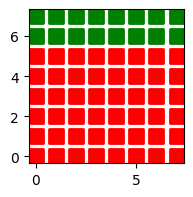

CONVERGENCE! Perceptron converged in  (epoch:21)
Weights => [ 0. 11.], bias=-60.0
----------------------------------------



In [147]:
import sys, site
sys.path.insert(0,"..") 
from perceptron import perceptron as tron
import importlib
importlib.reload(tron)


#generate a cards and train to detect horizontal partitions 
weights = np.zeros(2)
bias = 0
(X,Y) = training_card(vertical_partition=False)
draw_card(X,Y)
plt.show()
(weights,bias, convergence) = tron.perceptron(X,Y,weights, bias,epochs=50)

##
# Try changing the number of epochs. Lower epochs are usually better. 
##
if convergence:
    print(f"CONVERGENCE! Perceptron converged in  (epoch:{convergence})")
else: 
    print(f"Perceptron failed to converge")

print(f"Weights => {weights}, bias={bias}\n{'-'*40}\n")    


## How well trained is the perceptron?
If the perceptron converged above, the prediction errors below should be ZERO. However, some training sets may not converge in 50 epochs. 
In practice it takes a lot fewer than 50 iterations.


In [148]:

#now check how many prediction errors the perceptron has
def debug_function(x,y,a):
    print(f"x={x}, y={y}, a={a}", "\x1b[31mMismatch\x1b[0m" if (a * y) <= 0 else "OK")
tron.predict_only(X,Y,weights, bias,debug_function)


x=[0. 0.], y=-1.0, a=-60.0 OK
x=[0. 1.], y=-1.0, a=-49.0 OK
x=[0. 2.], y=-1.0, a=-38.0 OK
x=[0. 3.], y=-1.0, a=-27.0 OK
x=[0. 4.], y=-1.0, a=-16.0 OK
x=[0. 5.], y=-1.0, a=-5.0 OK
x=[0. 6.], y=1.0, a=6.0 OK
x=[0. 7.], y=1.0, a=17.0 OK
x=[1. 0.], y=-1.0, a=-60.0 OK
x=[1. 1.], y=-1.0, a=-49.0 OK
x=[1. 2.], y=-1.0, a=-38.0 OK
x=[1. 3.], y=-1.0, a=-27.0 OK
x=[1. 4.], y=-1.0, a=-16.0 OK
x=[1. 5.], y=-1.0, a=-5.0 OK
x=[1. 6.], y=1.0, a=6.0 OK
x=[1. 7.], y=1.0, a=17.0 OK
x=[2. 0.], y=-1.0, a=-60.0 OK
x=[2. 1.], y=-1.0, a=-49.0 OK
x=[2. 2.], y=-1.0, a=-38.0 OK
x=[2. 3.], y=-1.0, a=-27.0 OK
x=[2. 4.], y=-1.0, a=-16.0 OK
x=[2. 5.], y=-1.0, a=-5.0 OK
x=[2. 6.], y=1.0, a=6.0 OK
x=[2. 7.], y=1.0, a=17.0 OK
x=[3. 0.], y=-1.0, a=-60.0 OK
x=[3. 1.], y=-1.0, a=-49.0 OK
x=[3. 2.], y=-1.0, a=-38.0 OK
x=[3. 3.], y=-1.0, a=-27.0 OK
x=[3. 4.], y=-1.0, a=-16.0 OK
x=[3. 5.], y=-1.0, a=-5.0 OK
x=[3. 6.], y=1.0, a=6.0 OK
x=[3. 7.], y=1.0, a=17.0 OK
x=[4. 0.], y=-1.0, a=-60.0 OK
x=[4. 1.], y=-1.0, a=-49.0 OK
x=[4

0

# Poorly trained perceptron
Lets train the perceptron to perform poorly be training it very little. You should see some prediction errors


In [93]:
#Perceptron algorithm Diagram 

from mm_include import mermaid
mm("""
flowchart LR
    subgraph Inputs["Inputs"]
        A1["$$ x_1$$"]
        A2["$$ x_2$$"]
        ADOT[".."]
        AN["$$ x_n$$"]
    end
    subgraph subGraph1["Weights"]
        w1(("$$ w_1 $$"))
        w2(("$$ w_2 $$"))
        wDOT[".."]
        wN(("$$ w_n $$"))
    end
    C{"$$ z = \sum_{i=1}^n x_i w_i + b $$"}
    y["output"]
    step["$$\phi(z) \\text{\ 'step function'}$$"]

    %% Comments after double percent signs
    A1 --> w1 
    w1--> C
    A2 --> w2
    w2 --> C
    ADOT --> wDOT
    wDOT --> C
    AN --> wN
    wN --> C
    C --> step
    step ==> y
""")